In [ ]:
import json
from datetime import date

import matplotlib as mpl
import requests

today = date.today()

mpl.rcParams["figure.dpi"] = 150

start = "2020-01-01"
until = today.strftime("%Y-%m-%d")
author = "niradler55"

res = requests.get(
    f"https://npm-stat.com/api/download-counts?author={author}&from={start}&until={until}"
)

if res.status_code != 200:
    raise Exception(res.text)
    
data = json.loads(res.text)

In [ ]:
import csv

with open('npm_stats.csv', mode='w') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

    csv_writer.writerow(['date','name','downloads'])
    csv_writer.writerow(['Erica Meyers', 'IT', 'March'])

In [50]:
count = 0

for pkg in data:
    for key in data[pkg]:
        count += data[pkg][key]

print(f"{count} Downloads.")

47921 Downloads.


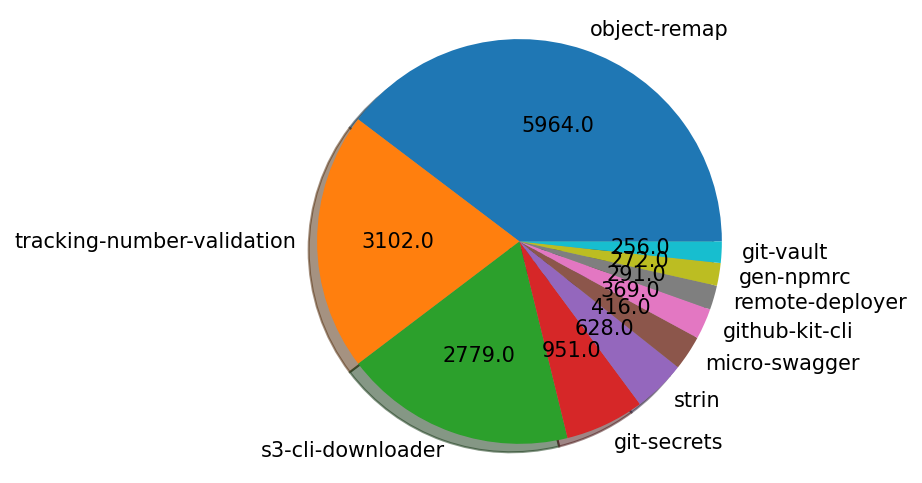

In [43]:
import matplotlib.pyplot as plt
import numpy

top10 = []

for pkg in data:
    count = 0
    for key in data[pkg]:
        count += data[pkg][key]

    top10.append({"name": pkg, "count": count})

top10.sort(key=lambda x: x["count"], reverse=True)
top10 = top10[:10]

keys = []
values = []
for i in top10:
    keys.append(i["name"])
    values.append(i["count"])


values = numpy.array(values)


def absolute_value(val):
    a = numpy.round(val / 100.0 * values.sum(), 0)
    return a


fig1, ax1 = plt.subplots()
ax1.pie(values, labels=keys, autopct=absolute_value, shadow=True)
ax1.axis("equal")

plt.show()

strin:


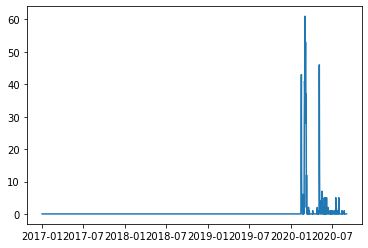

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime
import ipywidgets as widgets

# widgets.AppLayout(grid_gap='20px',
#           height="200px",
#           width="50%")
stats = []

for pkg in data:
    x = []
    y = []
    count = 0
    for key in data[pkg]:
        year, month, day = key.split("-")
        year = int(year)
        month = int(month)
        day = int(day)
        x.append(datetime.datetime(year, month, day))
        y.append(data[pkg][key])
        count += data[pkg][key]
    stats.append({"name": pkg, "count": count, "x": x, "y": y})

stats.sort(key=lambda x: x["count"], reverse=True)

top20 = stats[:20]
for i in top20:
    print(i["name"] + ":")
    x = np.array(i["x"])
    y = np.array(i["y"])
    plt.plot(x, y)
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

pkg = input()
res = requests.get(
    f"https://npm-stat.com/api/download-counts?package={pkg}&from={start}&until={until}"
)

if res.status_code != 200:
    raise Exception(res.text)

pkg_data = json.loads(res.text)

y = []
x = []
count = 0

for key in pkg_data[pkg]:
    year, month, day = key.split("-")
    year = int(year)
    month = int(month)
    day = int(day)
    x.append(datetime.datetime(year, month, day))
    y.append(pkg_data[pkg][key])
    count += pkg_data[pkg][key]

print(count,"Downalods.")
plt.plot(x, y)
plt.show()

In [ ]:
from ipywidgets import interact, widgets

def myfunc(x):
    return x * 2

interact(myfunc, x=widgets.IntSlider(min=-10, max=10, value=0))